In [1]:
# dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read CSV file 
file_to_load = "clean_sharks.csv"
victim_df = pd.read_csv(file_to_load)
victim_df.head()

,Attack Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,6/25/2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,6/18/2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN
2,6/9/2018,2018,Unknown,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,6/8/2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2 m shark
4,6/4/2018,2018,Provoked,MEXICO,Colima,La Ticla,Diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


In [3]:
# cleaning activities
victim_df.loc[victim_df['Activity'].str.contains('Float', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('Snork', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('tread', na =False,case=False), 'Activity'] = 'Swimming'
victim_df.loc[victim_df['Activity'].str.contains('waist', na =False,case=False), 'Activity'] = 'Swimming'

victim_df.loc[victim_df['Activity'].str.contains('Dive', na =False,case=False), 'Activity'] = 'Diving'

victim_df.loc[victim_df['Activity'].str.contains('sup', na =False,case=False), 'Activity'] = 'Boarding (Boogie, Paddle, Body, SUP)'
victim_df.loc[victim_df['Activity'].str.contains('paddl', na =False,case=False), 'Activity'] = 'Boarding (Boogie, Paddle, Body, SUP)'

victim_df.loc[victim_df['Activity'].str.contains('Kayak', na =False,case=False), 'Activity'] = 'Kayaking'

victim_df.loc[victim_df['Activity'].str.contains('Ski', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('Boat', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'

victim_df.loc[victim_df['Activity'].str.contains('Row', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('sail', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('cruise', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('dinghy', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'
victim_df.loc[victim_df['Activity'].str.contains('canoe', na =False,case=False), 'Activity'] = 'Boating (canoe, cruise, row)'

victim_df.loc[victim_df['Activity'].str.contains('rac', na =False,case=False), 'Activity'] = 'Competition'
victim_df.loc[victim_df['Activity'].str.contains('compet', na =False,case=False), 'Activity'] = 'Competition'

victim_df.loc[victim_df['Activity'].str.contains('Rescue', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Feeding', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Free', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('Play', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('jump', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('film', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('research', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('anchor', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('drill', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('fell', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('retri', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('fix', na =False,case=False), 'Activity'] = 'Accident'
victim_df.loc[victim_df['Activity'].str.contains('rescuing', na =False,case=False), 'Activity'] = 'Accident'

victim_df.loc[victim_df['Activity'].str.contains('Disaster', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('tsunami', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('capsi', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('plung', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('adrift', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('murder', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('sank', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('passenger', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('sink', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('run down', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('aircraft', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('wreck', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('foundering', na =False,case=False), 'Activity'] = 'Disaster'
victim_df.loc[victim_df['Activity'].str.contains('illegal', na =False,case=False), 'Activity'] = 'Disaster'

victim_df.loc[victim_df['Activity'].str.contains('pet', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('Rescue', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('shark', na =False,case=False), 'Activity'] = 'Interacting with Shark'
victim_df.loc[victim_df['Activity'].str.contains('NSB', na =False,case=False), 'Activity'] = 'Interacting with Shark'

victim_df.loc[victim_df['Activity'].str.contains('crab', na =False,case=False), 'Activity'] = 'Fishing (fish, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('shrimp', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('sardines', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('lobster', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('bichiques', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('catch', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('casting', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'
victim_df.loc[victim_df['Activity'].str.contains('fishing', na =False,case=False), 'Activity'] = 'Fishing (fish, shrimp, lobster, crabs)'

victim_df.loc[victim_df['Activity'].str.contains('stand', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('walk', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('stam', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('wash', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('collect', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('wading', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('bath', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('sit', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('crouch', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('crawl', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('hiking', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('watch', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('exercis', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('splash', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('photo', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('prone', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'
victim_df.loc[victim_df['Activity'].str.contains('kneel', na =False,case=False), 'Activity'] = 'On Shore (wading, walking, sitting)'

victim_df.loc[victim_df['Activity'].str.contains('Kakaying', na =False,case=False), 'Activity'] = 'Kayaking'

victim_df.loc[victim_df['Activity'].str.contains('batin', na =False,case=False), 'Activity'] = 'Unknown'
victim_df.loc[victim_df['Activity'].str.contains('cruising', na =False,case=False), 'Activity'] = 'Unknown'

victim_df['Activity'].value_counts()

Surfing                                   1104
Swimming                                   577
Fishing (fish, shrimp, lobster, crabs)     524
Diving                                     224
On Shore (wading, walking, sitting)        201
Boarding (Boogie, Paddle, Body, SUP)       164
Unknown                                     54
Accident                                    48
Boating (canoe, cruise, row)                46
Disaster                                    41
Interacting with Shark                      41
Kayaking                                    37
                                             1
Name: Activity, dtype: int64

All activities grouped together by main intention. Accidents relates to unintential accidents while disasters relate to weather, wrecks, and human intent to cause harm. Batin and Cruising are grouped in Unknown as these have many definations and context is unknown. 

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (3192).

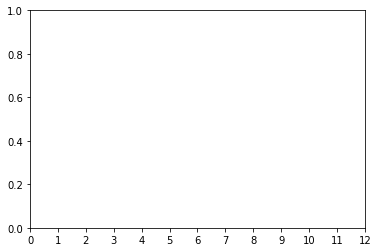

In [5]:
activity = victim_df['Activity']
#count = victim_df['Activity'].value_counts()
x_axis = np.arange(len(count))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, activity)

plt.title("Attacks by Activity since 1975")
plt.xlabel("Activity")
plt.ylabel("Attack Count")

plt.bar(x_axis, activity, color="c", align="center")